<h1>A Voice Activity Detector based on MFCC features</h1>

This notebook shows how to build a Voice Activity classifier using MFCC features. 

**Why MFCC?**

MFCC are a good starting point when building an audio classifier designed to distinguish between audio recordings based on their **timbre**, since they provide a compact representation of the spectral envelope. Examples of audio classses that are well characterized by their timbre include musical instruments (e.g. trumpet vs. piano) or urban environmental sounds (e.g. siren vs. car honk vs. and jackhammer).

However, it is important to bear in mind that not all audio-related classification tasks are timbre-related. For example, you might be interested in identifying (classifiying) the chords played in a music recording. What makes one chord different from another is **not its timbre**: the same chord can be played by different instruments with different timbres and it will still be the same chord. What makes chords different (among other factors) are the notes (pitches) they contain. Thus, a more suitable class of features for chord classification would be [chroma features](https://en.wikipedia.org/wiki/Chroma_feature).

Since in this example we want to distinguish between human voice presence and abscence on a song (genres), which (usually) have different timbre, MFCC are probably a good choice for the task.

**IMPORTANT**: This example makes one assumption:

1. All the audio files have been preprocessed to ensure they are in the same format: single channel (mono) with a sample rate of 44100 Hz and a bit depth of 16 in wav format. If you haven't preprocessed your audio, consult the **```convert_audio_format```** notebook in this repository. Working with audio files in different formats can lead to unexpected (=undesired!) results.


Dependencies:
* numpy: http://www.numpy.org/
* scikit-learn: http://scikit-learn.org/
* librosa: http://librosa.github.io/librosa/
* matplotlib: http://matplotlib.org/

In [1]:
# Load the modules we're going to need
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import os
import glob
import librosa
import pandas as pd# Added
from IPython.display import Audio
from sklearn.externals import joblib

import json

/home/shayenne/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


<h2>Step 0: Compiling your dataset</h2>

For creating this example I've used a collection of songs with human singers. All the files have been preprocessed using the ```convert_audio_format``` and ```rename_files_predix``` notebooks, and then divided into a train and test folder. There are 13 files in the train folder and 4 files in the test folder.

Since we will use different files in class (your music!), the results displayed in this notebook will be different when we run it in class. {?}

<h2>Step 1: Data cleaning</h2>

As noted above, this notebook assumes data cleaning has already been performed: all files are in the same format (single channel [mono], 16-bit depth, 44100 sample rate, wav), and the class label of each file is indicated as a prefix followed by an underscore in the filename.

In [2]:
# We've previously preprocessed our data and coverted all files to a sample rate of 44100
samplerate = 44100

<h2>Step 2: Feature extraction</h2>

In [3]:
with open('split_remb.json', 'r') as f:
    split = json.load(f)

In [4]:
dt_path = '/home/shayenne/Documents/rembDB_labeledExamples/'

In [5]:
train_files = []
test_files = []

In [6]:
for train_folder in split['train']:
    
    # Get a list of all the training audio files (must be .WAV files)
    train_files += glob.glob(os.path.join(dt_path+train_folder, '*.mp3'))

In [7]:
for test_folder in split['test']:
    # Get a list of all the test audio files (must be .WAV files)
    test_files += glob.glob(os.path.join(dt_path+test_folder, '*.mp3'))

In [8]:
import feather

/home/shayenne/Documents/rembDB_labeledExamples/Batis/Gyftopoula sto hamam-1934.mp3


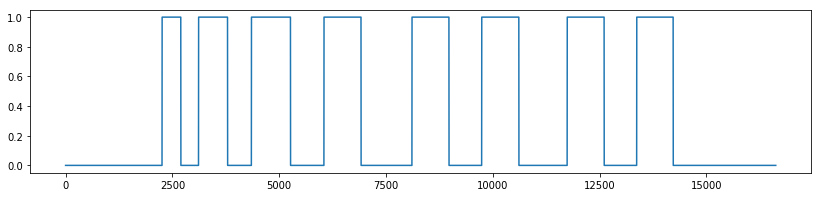

/home/shayenne/Documents/rembDB_labeledExamples/Batis/12 fonografitzides.mp3


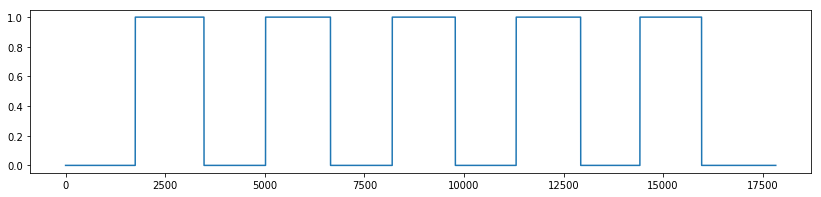

/home/shayenne/Documents/rembDB_labeledExamples/Batis/04 04 - O 8ermasths (1934).mp3


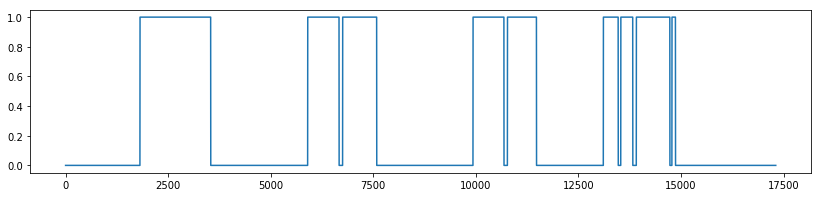

/home/shayenne/Documents/rembDB_labeledExamples/Tsaousakis/01 Na pethanis atahti.mp3


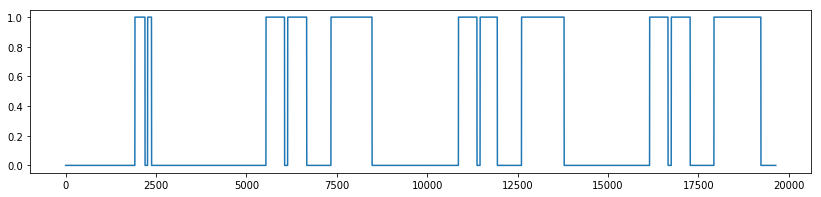

/home/shayenne/Documents/rembDB_labeledExamples/Tsaousakis/02 Simmorfosou pia.mp3


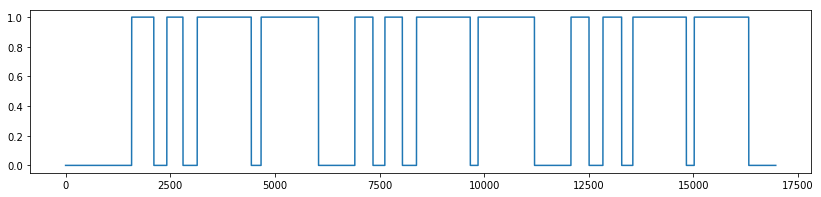

/home/shayenne/Documents/rembDB_labeledExamples/Tsaousakis/03 Mpros ston Agio Spiridona.mp3


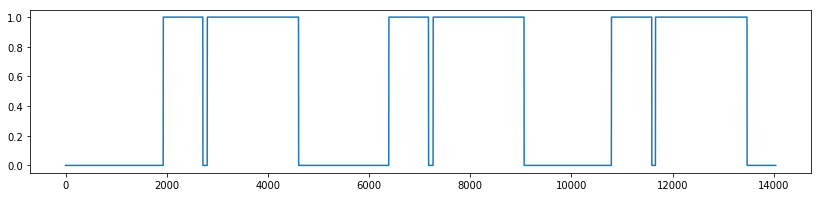

/home/shayenne/Documents/rembDB_labeledExamples/Rita/2-05 O Xemangas.mp3


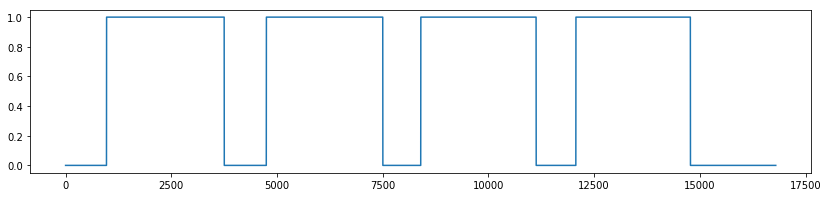

/home/shayenne/Documents/rembDB_labeledExamples/Rita/05 Kalogria.mp3


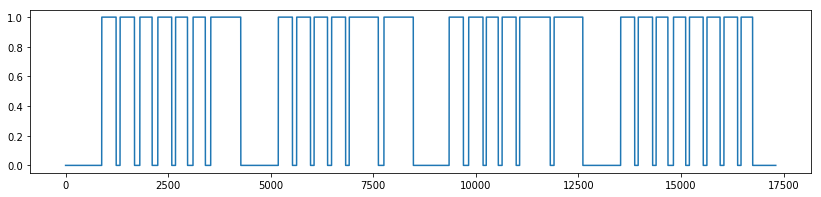

/home/shayenne/Documents/rembDB_labeledExamples/Rita/02 O psyllos (Rita Ampatzh).mp3


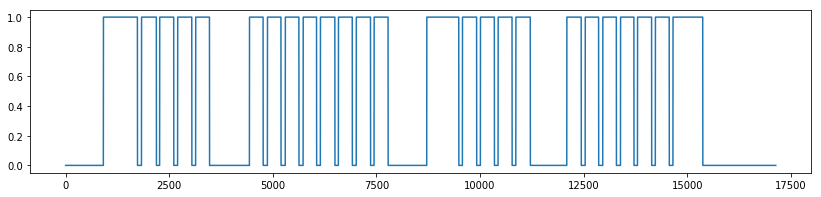

/home/shayenne/Documents/rembDB_labeledExamples/Genitzarhs/Jen-Ego Kala Kathomouna.mp3


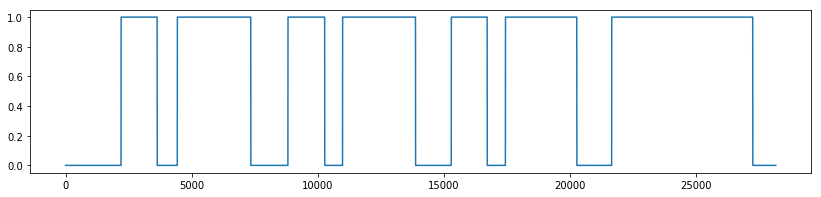

/home/shayenne/Documents/rembDB_labeledExamples/Genitzarhs/07 Ego Magkas Fainomouna.mp3


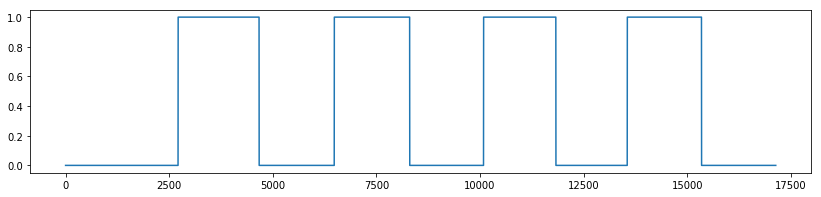

/home/shayenne/Documents/rembDB_labeledExamples/Genitzarhs/Jen-Epidromi Sto Pirea.mp3


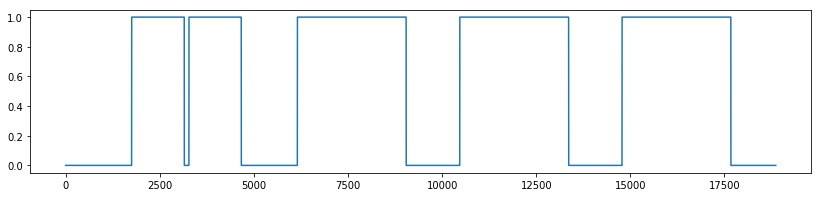

/home/shayenne/Documents/rembDB_labeledExamples/Agathonas/03 - pente magkes ston peraia.mp3


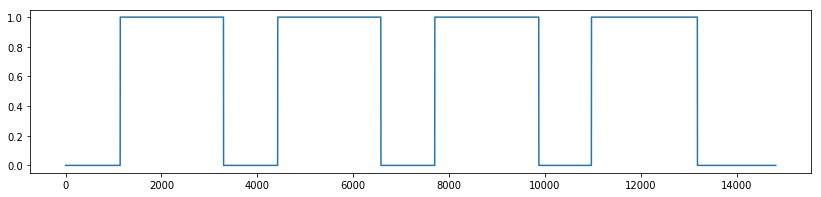

/home/shayenne/Documents/rembDB_labeledExamples/Agathonas/01 - gia des me.mp3


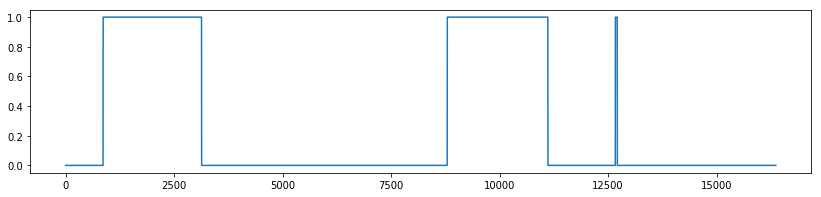

/home/shayenne/Documents/rembDB_labeledExamples/Agathonas/04 - to xaremi sto xamam.mp3


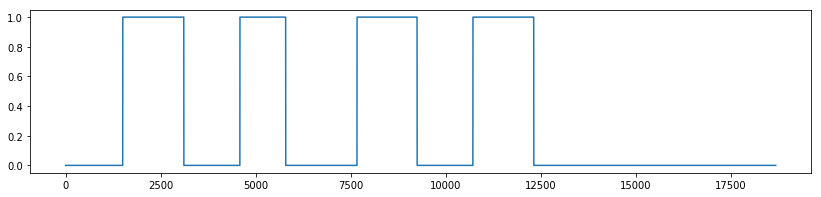

/home/shayenne/Documents/rembDB_labeledExamples/Xarmas/32 Den 8a xorisoume pote.mp3


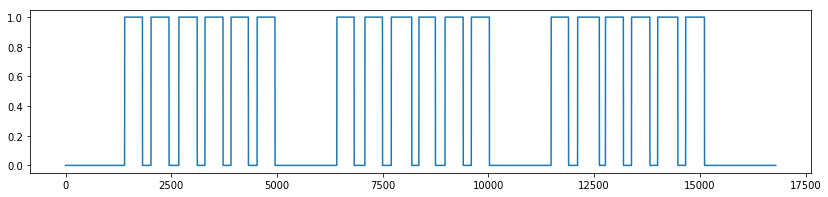

/home/shayenne/Documents/rembDB_labeledExamples/Xarmas/32 Den ypoferese.mp3


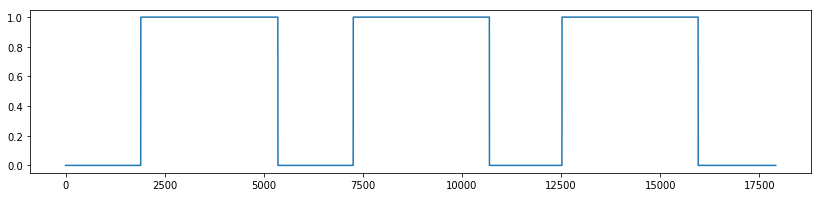

/home/shayenne/Documents/rembDB_labeledExamples/Xarmas/32 Allou to pas.mp3


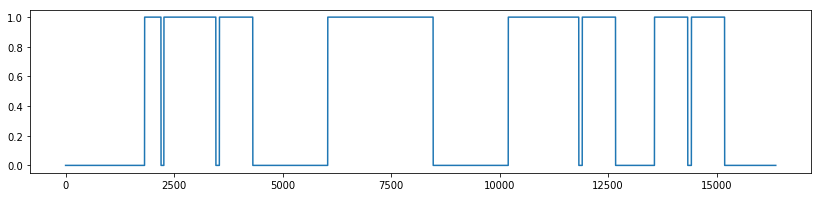

/home/shayenne/Documents/rembDB_labeledExamples/Stellakis/04 Xtes To Vradi Ston Teke Mas.mp3


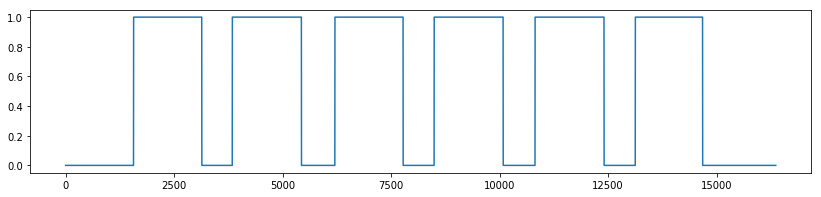

/home/shayenne/Documents/rembDB_labeledExamples/Stellakis/06 Mpouzoukaki.mp3


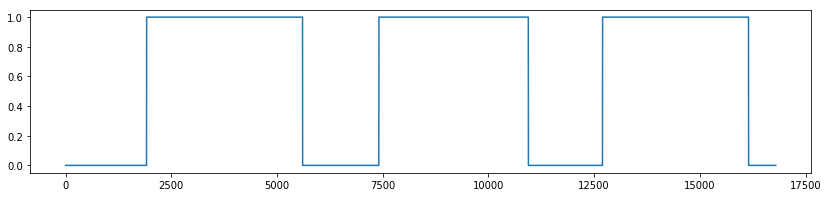

/home/shayenne/Documents/rembDB_labeledExamples/Stellakis/03 Liono san keri.mp3


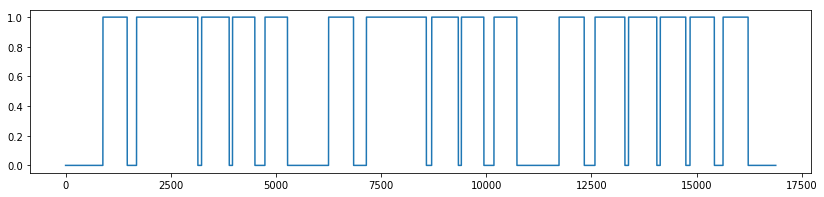

/home/shayenne/Documents/rembDB_labeledExamples/Mariw/03 - tsakitzis.mp3


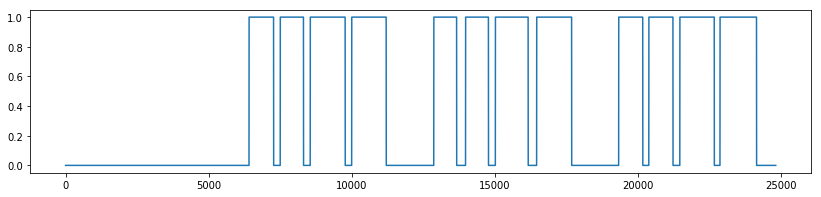

/home/shayenne/Documents/rembDB_labeledExamples/Mariw/02 Kati tha ipie o Theos.mp3


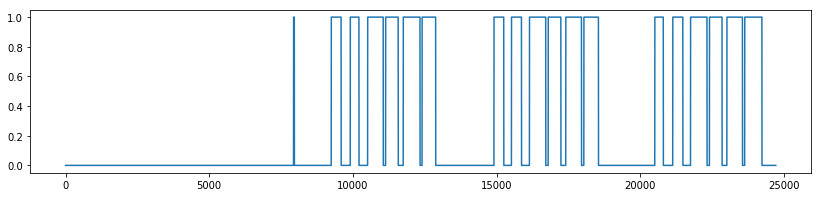

/home/shayenne/Documents/rembDB_labeledExamples/Mariw/03 Omorfh Salonikia moy.mp3


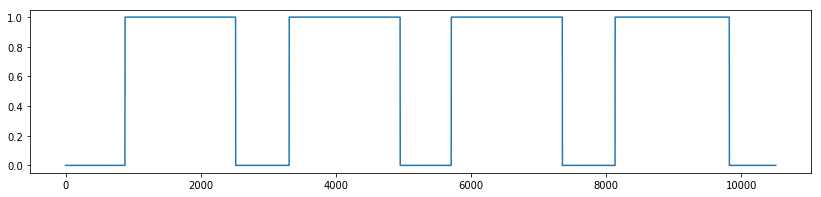

/home/shayenne/Documents/rembDB_labeledExamples/Marika/02 kremetai i kapota.mp3


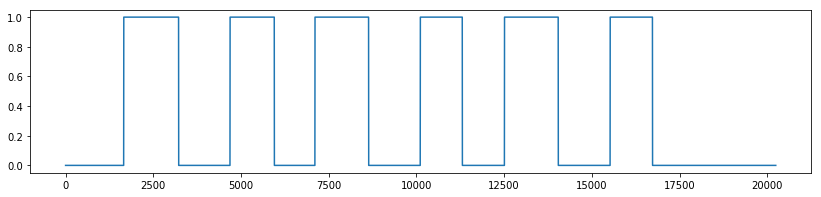

/home/shayenne/Documents/rembDB_labeledExamples/Marika/03 ntavelis.mp3


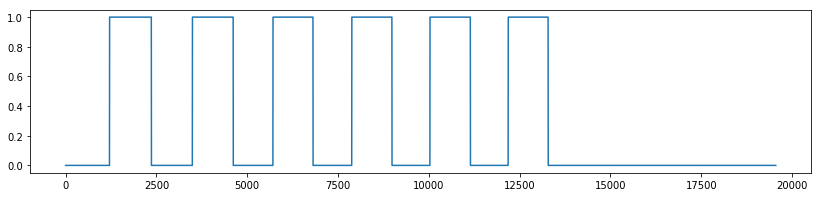

/home/shayenne/Documents/rembDB_labeledExamples/Marika/01 peismatariko.mp3


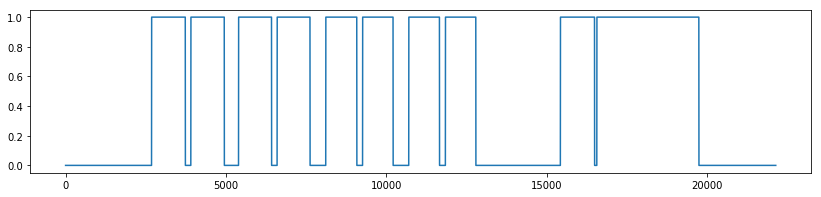

/home/shayenne/Documents/rembDB_labeledExamples/Dalkas/03 To mpaglamadaki spase.mp3


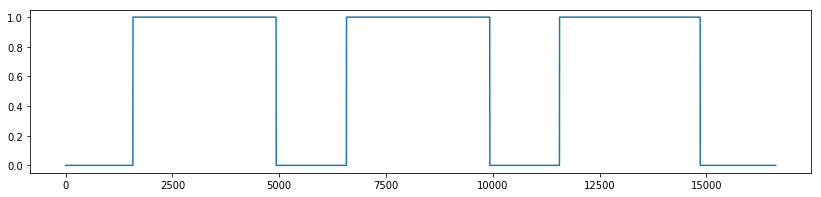

/home/shayenne/Documents/rembDB_labeledExamples/Dalkas/02 Ap'thn polh enas morths.mp3


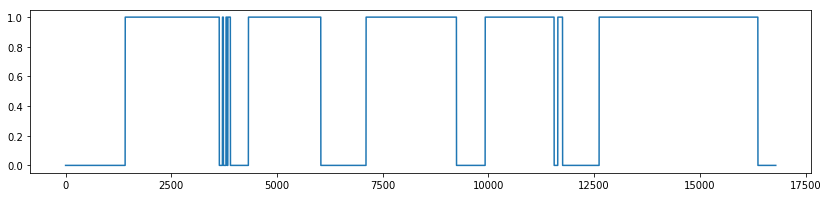

/home/shayenne/Documents/rembDB_labeledExamples/Dalkas/02 Ksysou Gero.mp3


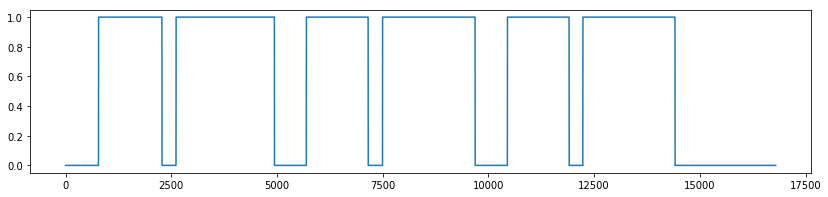

/home/shayenne/Documents/rembDB_labeledExamples/Gkoles/03 to skertso sou to magiko 1.mp3


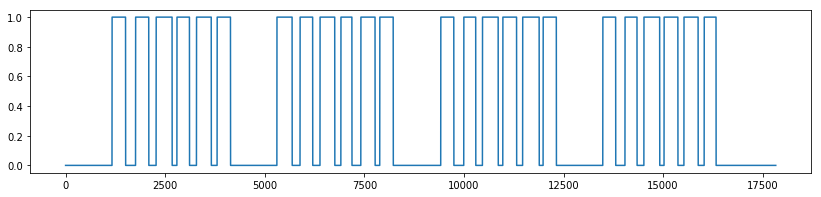

/home/shayenne/Documents/rembDB_labeledExamples/Gkoles/01 otan se vlepo na girizeis.mp3


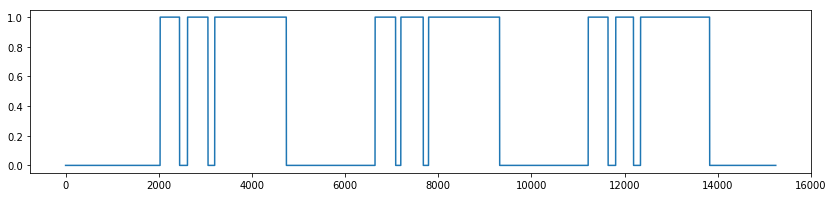

/home/shayenne/Documents/rembDB_labeledExamples/Gkoles/02 i amartoli.mp3


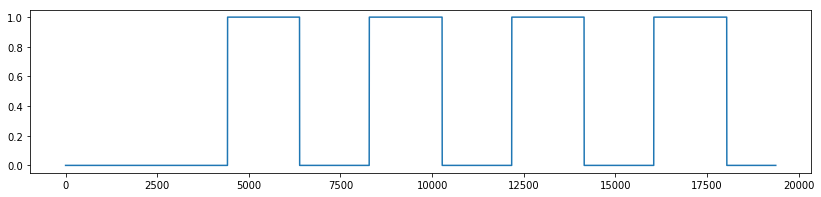

/home/shayenne/Documents/rembDB_labeledExamples/Xatzixristos/To parapono tou alhth.mp3


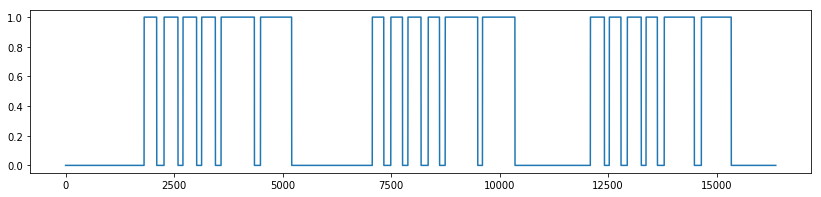

/home/shayenne/Documents/rembDB_labeledExamples/Xatzixristos/Paraponiariko mou.mp3


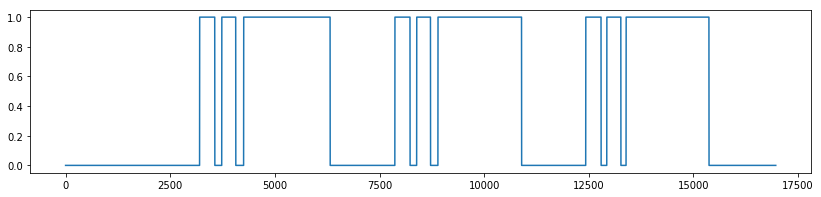

/home/shayenne/Documents/rembDB_labeledExamples/Xatzixristos/3an8eia smurniotopoula.mp3


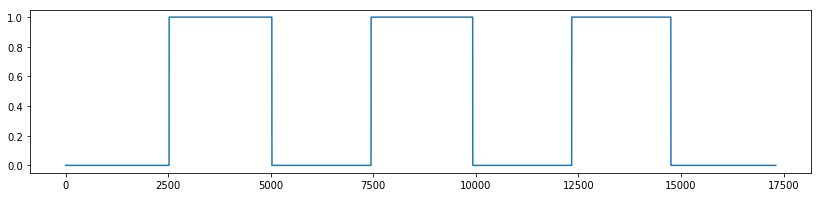

/home/shayenne/Documents/rembDB_labeledExamples/Glykeria/08 TA DAXTILIDIA.mp3


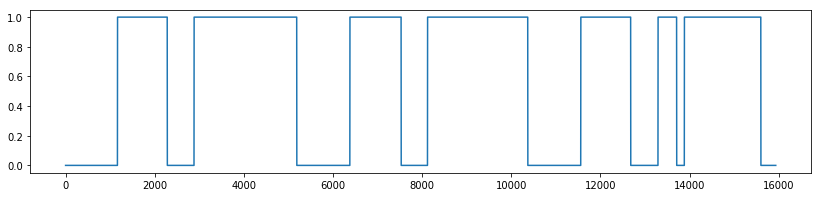

/home/shayenne/Documents/rembDB_labeledExamples/Glykeria/08 TO XARIKLAKI.mp3


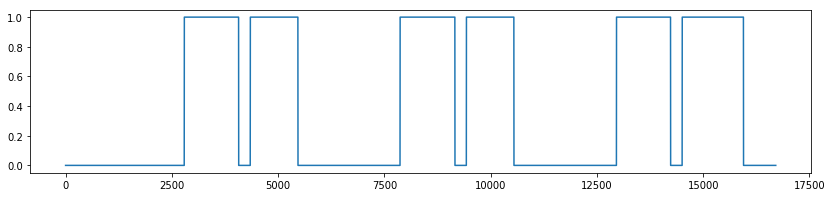

/home/shayenne/Documents/rembDB_labeledExamples/Glykeria/01 STI MAGEMENI ARAPIA.mp3


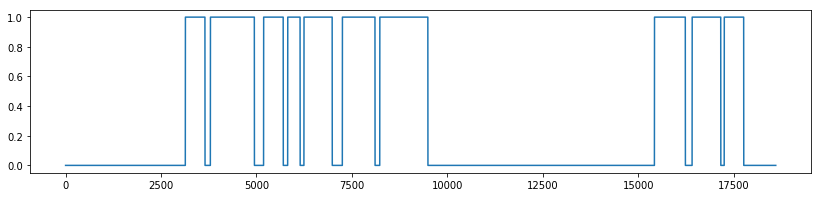

/home/shayenne/Documents/rembDB_labeledExamples/Delias/2-07 To Sakkaki.mp3


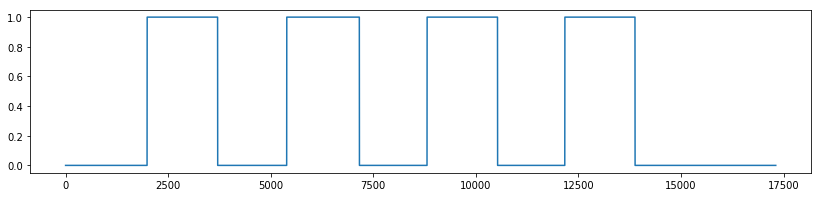

/home/shayenne/Documents/rembDB_labeledExamples/Delias/2-04 To Haremi Sto Hamam.mp3


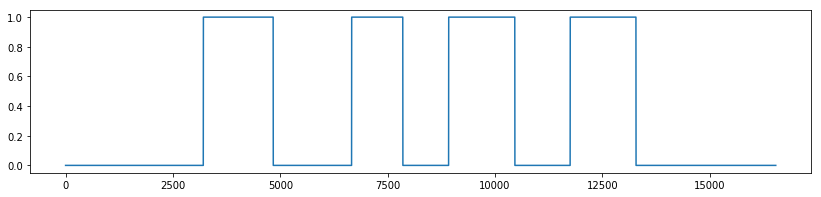

/home/shayenne/Documents/rembDB_labeledExamples/Delias/1-01 O Ponos Tu Prezakia.mp3


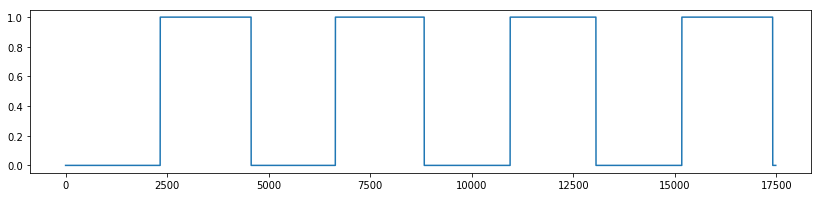

/home/shayenne/Documents/rembDB_labeledExamples/Roukounas/01 O katadikos.mp3


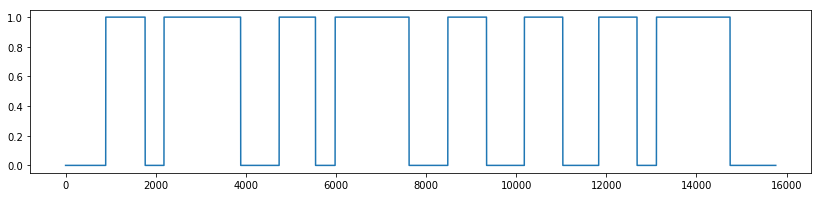

/home/shayenne/Documents/rembDB_labeledExamples/Roukounas/02 O glentzes.mp3


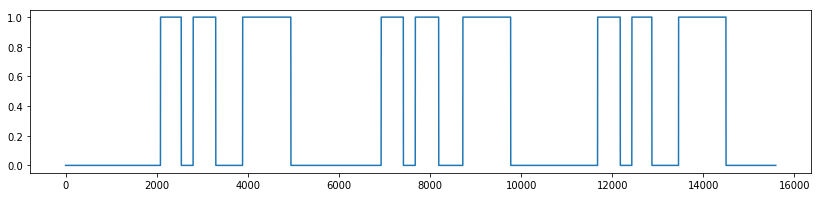

/home/shayenne/Documents/rembDB_labeledExamples/Roukounas/03 Geia sou lola meraklou.mp3


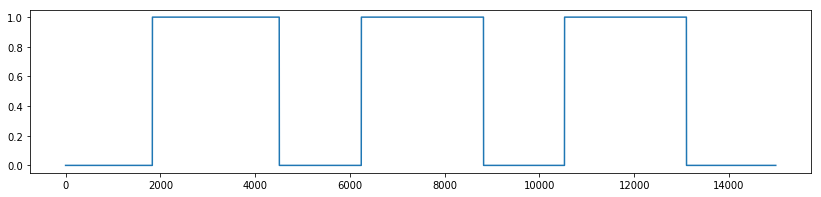

/home/shayenne/Documents/rembDB_labeledExamples/Markos/2-03 Oli I Rembetes Tu Dunia.mp3


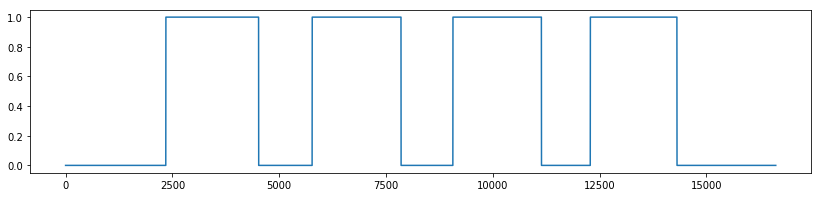

/home/shayenne/Documents/rembDB_labeledExamples/Markos/1-17 Kandone Stavro Kandone.mp3


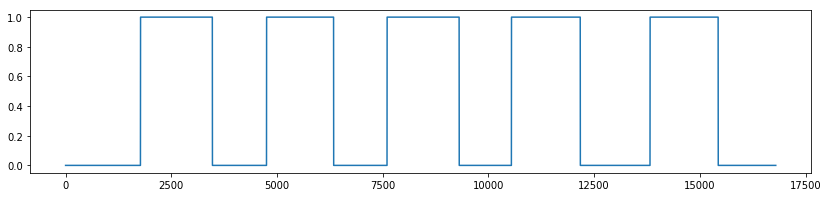

/home/shayenne/Documents/rembDB_labeledExamples/Markos/03 Rixe Tsiggana Ta Hartia.mp3


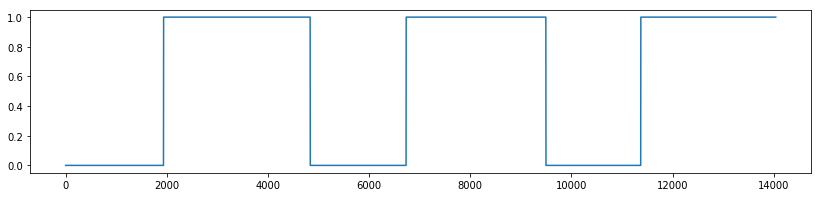

/home/shayenne/Documents/rembDB_labeledExamples/Roza/01 tou peiraia t alani.mp3


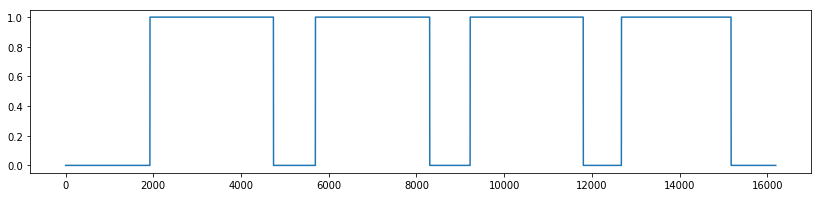

/home/shayenne/Documents/rembDB_labeledExamples/Roza/02 Eimai Prezakias.mp3


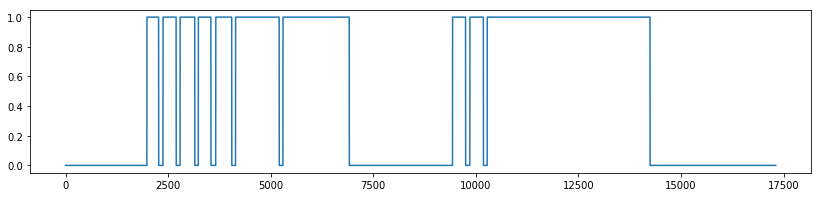

/home/shayenne/Documents/rembDB_labeledExamples/Roza/01 Stis Athinas tis Omorfies.mp3


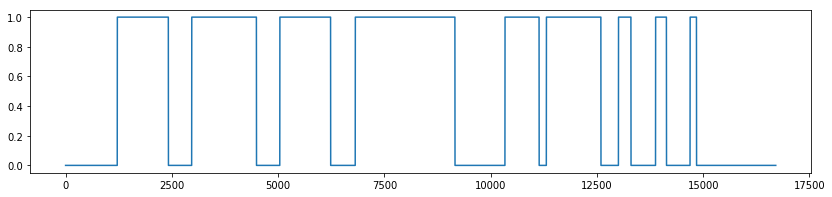

In [10]:
save_path = '/home/shayenne/Documents/Mestrado/REMB/'

for piece in train_files:

    audio, sr = librosa.load(piece, sr=None)

    df = feather.read_dataframe(save_path + os.path.basename(piece.split('.')[0]) + '_lbl.feather')
    print(piece)
    plt.figure(figsize=(14,3))
    timestamps = np.arange(df['0'].shape[0])/(sr/512)
    plt.plot(df['0'])
    plt.show()

In [12]:
# Specify the labels (classes) we're going to classify the data into
label0 = 'abscent'
label1 = 'present'
labels = [label0, label1]

We're going to compute MFCC features using 40 mel bands, 40 DCT coefficients, keeping the bottom 13 MFCC coefficients after skipping the first coefficient (i.e. keep MFCC coefficieints 1-13, discard coefficients 0 and 14-39).

Before training (and testing), we are going to standardize our features across each dimension (this is particularly important if you plan to use an SVM classifier for some kernel functions).

**Tip 1**: we might be able to obtain better clasification by adding more features to our feature vector. For example, we could compute the delta (first derivative) of each MFCC coefficient time-series (```np.diff(mfcc)```) and compute summary statistics from this time series as well. We could even do the same for the delta-delta (second derivative). Another option would be to add more summary statistics such as the minimum, maximum, median, or higher-order moments such as skewness and kurtosis. Be careful though: if the dimensionality of your featue vector is too high you run the risk of overfitting your data, especially if your dataset is small!

**Tip 2**: since the train/test sets used in this example are relatively small, and since we're only going to run through this example once, the features are computed on the fly in memory. If, however, you are working with a larger dataset (e.g. UrbanSound8K), feature extraction can take a considerable time. In this case, it's a good idea to store the features to disk, so that you can experiment with different classification models and classifier hyper-parameters without having to re-compute the features every time.

Lets start by defining the parameters of our MFCC features: 
* window (frame) size
* hop size
* number of mel bands (the number of DCT coefficients will be the same in this implementation) 
* number of MFCC coefficients to keep: 

In [13]:
window_size = 2048
hop_size = 441
n_bands = 40
n_mfcc = 13

In [14]:
# Make 1 second summarization as features with half second of hop length
# 172 frames == 1 second (using 44100 samples per second)
feature_length = 96
half_sec = 48

Now we'll extract features from the training set:

filename: Gyftopoula sto hamam-1934.mp3
mfcc shape (13, 19396)
number of chunks 404
file label size: 404
 


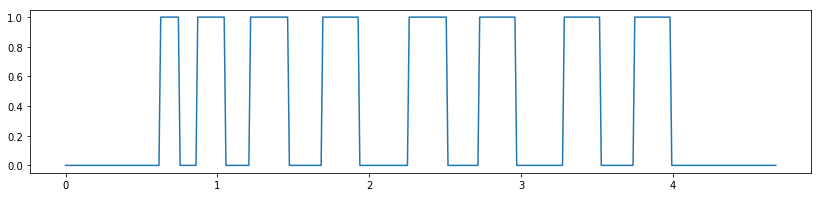

filename: 12 fonografitzides.mp3
mfcc shape (13, 20773)
number of chunks 432
file label size: 432
 


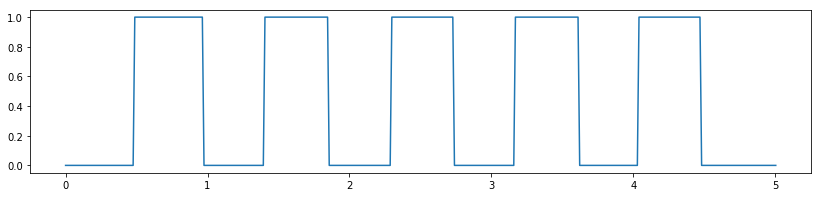

filename: 04 04 - O 8ermasths (1934).mp3
mfcc shape (13, 20204)
number of chunks 420
file label size: 420
 


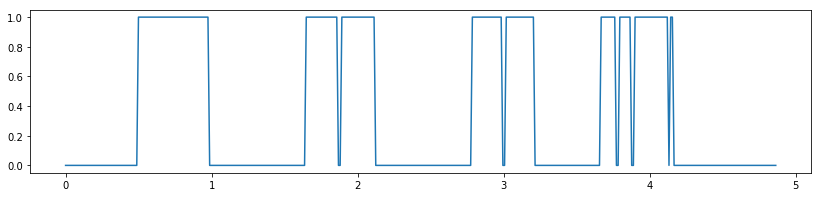

filename: 01 Na pethanis atahti.mp3
mfcc shape (13, 22845)
number of chunks 475
file label size: 475
 


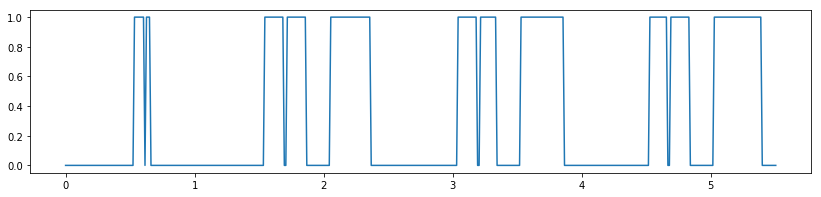

filename: 02 Simmorfosou pia.mp3
mfcc shape (13, 19741)
number of chunks 411
file label size: 411
 


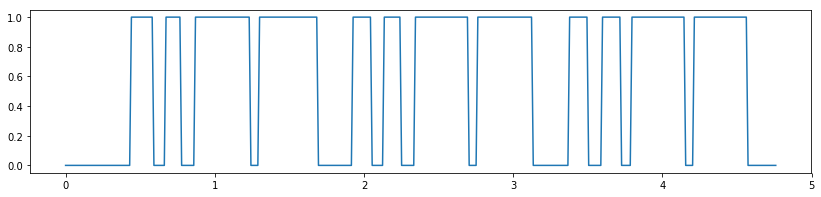

filename: 03 Mpros ston Agio Spiridona.mp3
mfcc shape (13, 16395)
number of chunks 341
file label size: 341
 


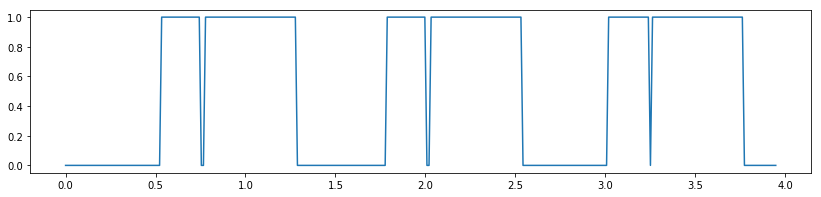

filename: 2-05 O Xemangas.mp3
mfcc shape (13, 19553)
number of chunks 407
file label size: 407
 


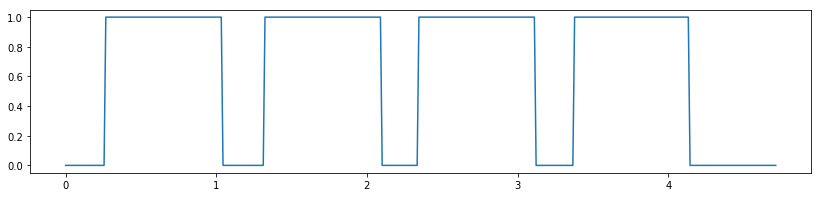

filename: 05 Kalogria.mp3
mfcc shape (13, 20149)
number of chunks 419
file label size: 419
 


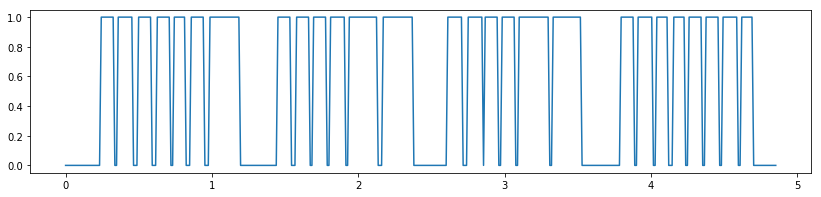

filename: 02 O psyllos (Rita Ampatzh).mp3
mfcc shape (13, 19981)
number of chunks 416
file label size: 416
 


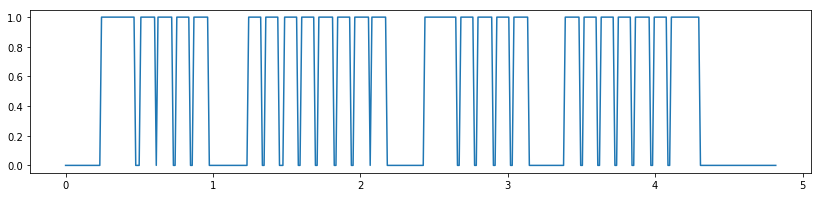

filename: Jen-Ego Kala Kathomouna.mp3
mfcc shape (13, 32527)
number of chunks 677
file label size: 677
 


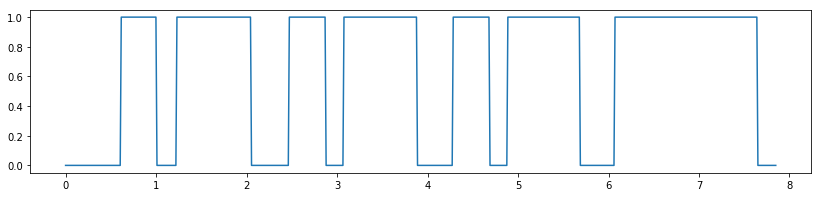

filename: 07 Ego Magkas Fainomouna.mp3
mfcc shape (13, 19914)
number of chunks 414
file label size: 414
 


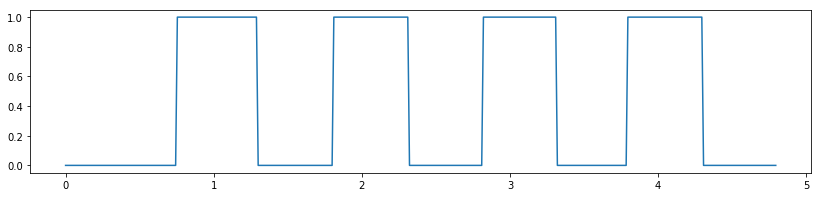

filename: Jen-Epidromi Sto Pirea.mp3
mfcc shape (13, 21727)
number of chunks 452
file label size: 452
 


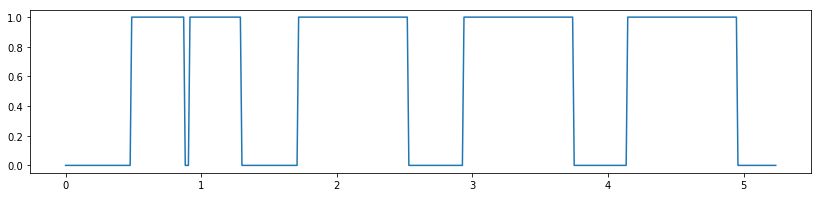

filename: 03 - pente magkes ston peraia.mp3
mfcc shape (13, 17301)
number of chunks 360
file label size: 360
 


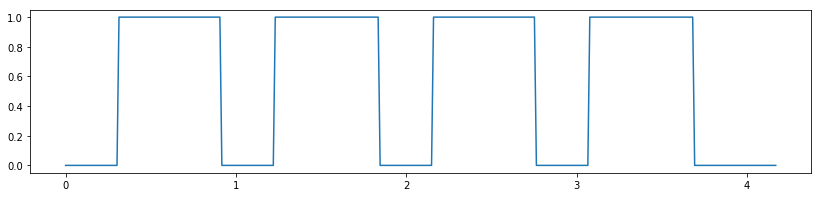

filename: 01 - gia des me.mp3
mfcc shape (13, 19075)
number of chunks 397
file label size: 397
 


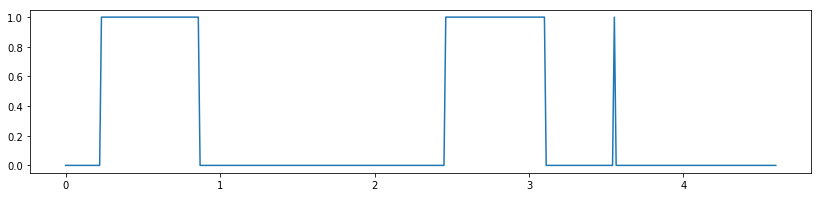

filename: 04 - to xaremi sto xamam.mp3
mfcc shape (13, 21789)
number of chunks 453
file label size: 453
 


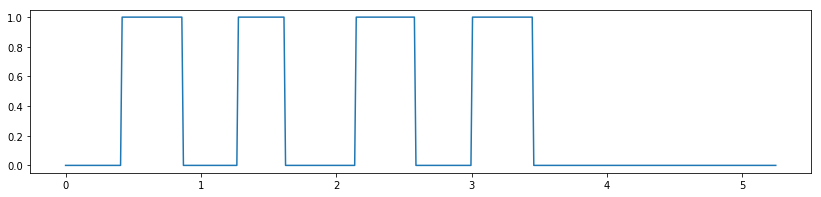

filename: 32 Den 8a xorisoume pote.mp3
mfcc shape (13, 19511)
number of chunks 406
file label size: 406
 


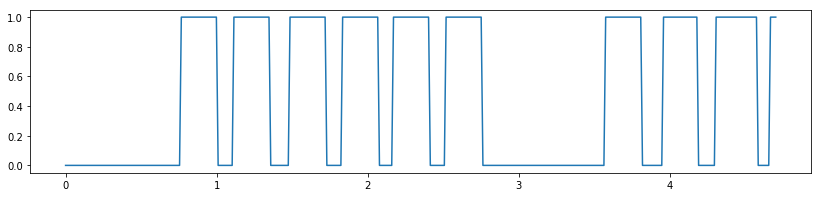

filename: 32 Den ypoferese.mp3
mfcc shape (13, 20888)
number of chunks 435
file label size: 435
 


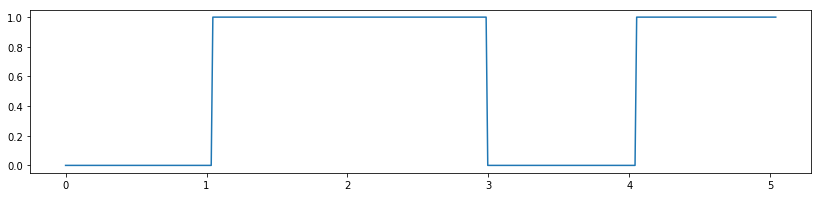

filename: 32 Allou to pas.mp3
mfcc shape (13, 19036)
number of chunks 396
file label size: 396
 


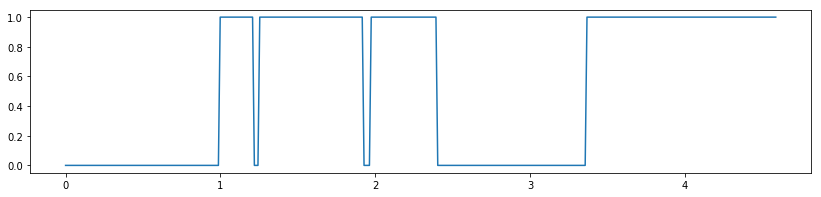

filename: 04 Xtes To Vradi Ston Teke Mas.mp3
mfcc shape (13, 19046)
number of chunks 396
file label size: 396
 


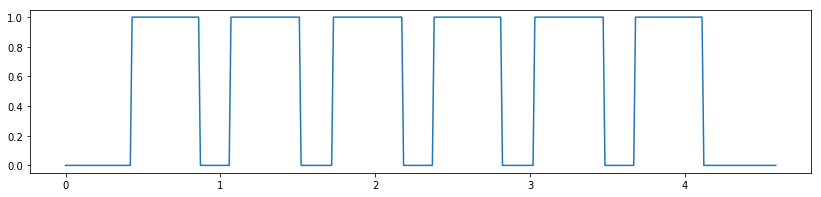

filename: 06 Mpouzoukaki.mp3
mfcc shape (13, 19566)
number of chunks 407
file label size: 407
 


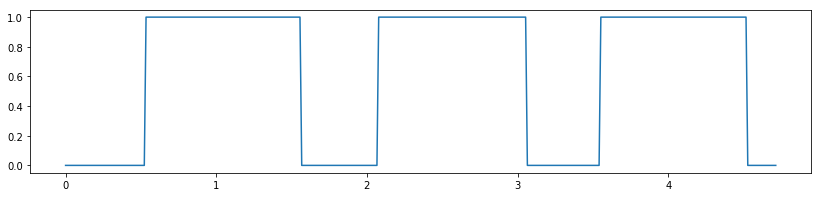

filename: 03 Liono san keri.mp3
mfcc shape (13, 19652)
number of chunks 409
file label size: 409
 


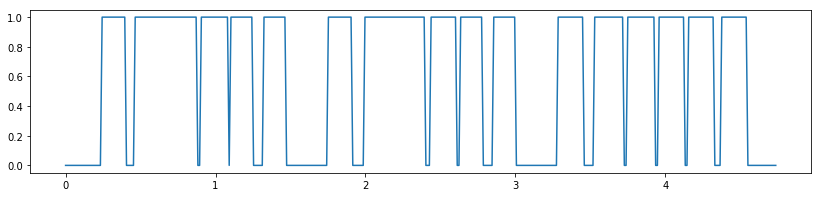

filename: 03 - tsakitzis.mp3
mfcc shape (13, 34187)
number of chunks 712
file label size: 712
 


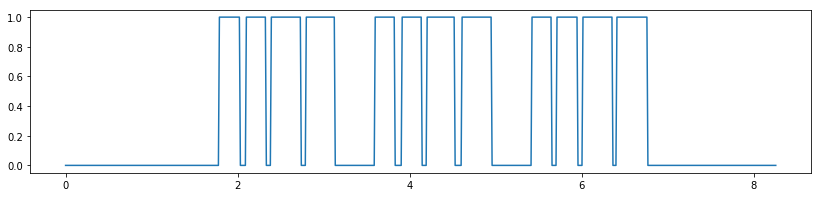

filename: 02 Kati tha ipie o Theos.mp3
mfcc shape (13, 28712)
number of chunks 598
file label size: 598
 


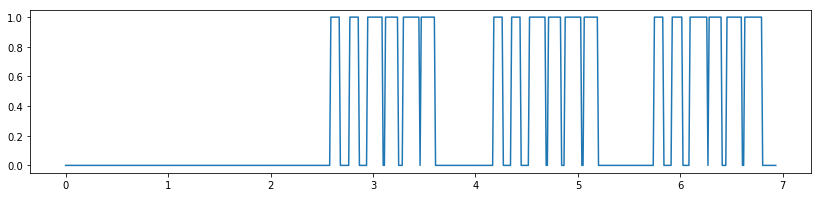

filename: 03 Omorfh Salonikia moy.mp3
mfcc shape (13, 12226)
number of chunks 254
file label size: 254
 


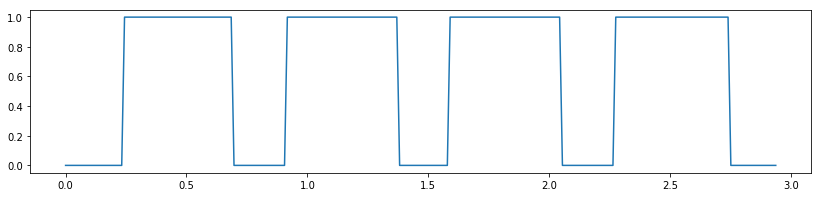

filename: 02 kremetai i kapota.mp3
mfcc shape (13, 23566)
number of chunks 490
file label size: 490
 


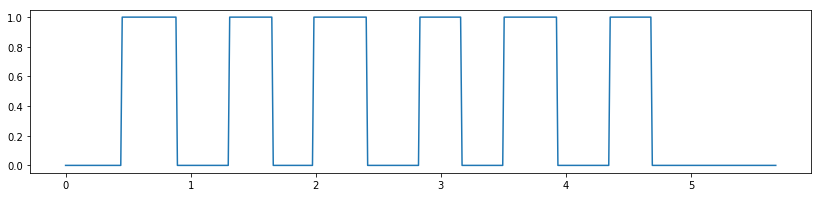

filename: 03 ntavelis.mp3
mfcc shape (13, 22758)
number of chunks 474
file label size: 474
 


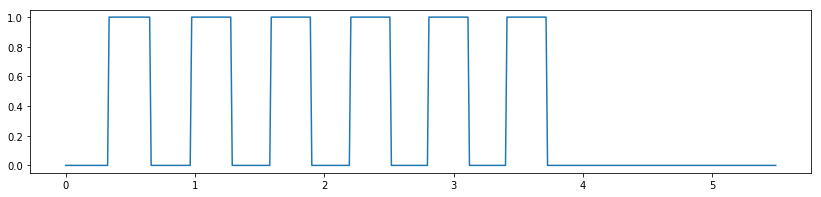

filename: 01 peismatariko.mp3
mfcc shape (13, 25755)
number of chunks 536
file label size: 536
 


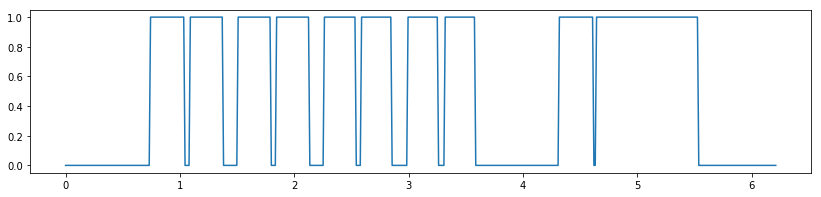

filename: 03 To mpaglamadaki spase.mp3
mfcc shape (13, 19389)
number of chunks 403
file label size: 403
 


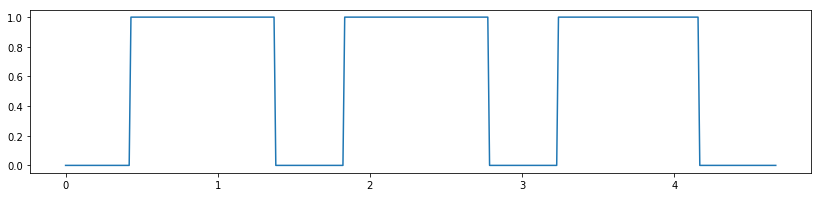

filename: 02 Ap'thn polh enas morths.mp3
mfcc shape (13, 19522)
number of chunks 406
file label size: 406
 


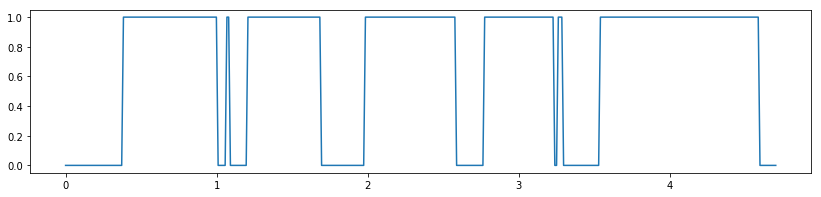

filename: 02 Ksysou Gero.mp3
mfcc shape (13, 19530)
number of chunks 406
file label size: 406
 


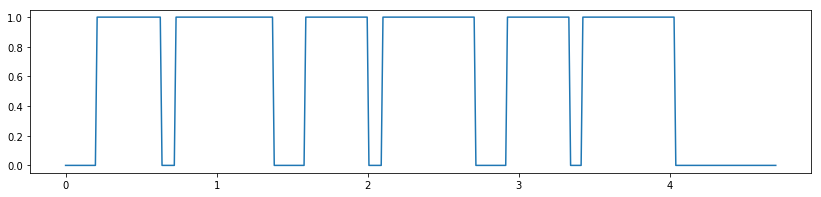

filename: 03 to skertso sou to magiko 1.mp3
mfcc shape (13, 20755)
number of chunks 432
file label size: 432
 


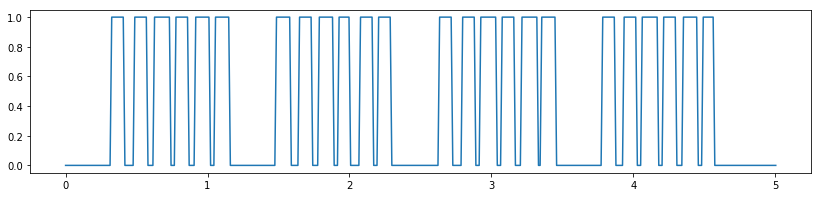

filename: 01 otan se vlepo na girizeis.mp3
mfcc shape (13, 17725)
number of chunks 369
file label size: 369
 


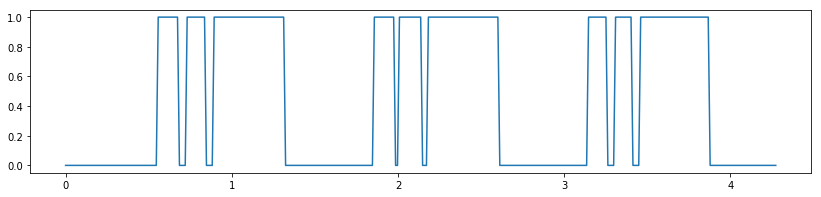

filename: 02 i amartoli.mp3
mfcc shape (13, 22523)
number of chunks 469
file label size: 469
 


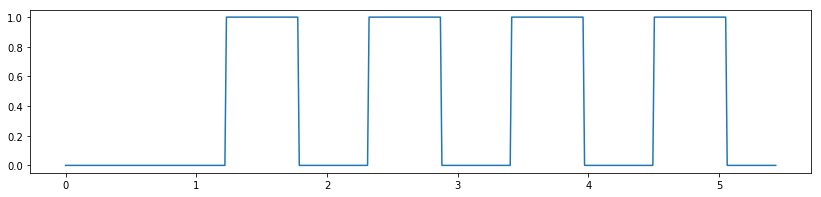

filename: To parapono tou alhth.mp3
mfcc shape (13, 19122)
number of chunks 398
file label size: 398
 


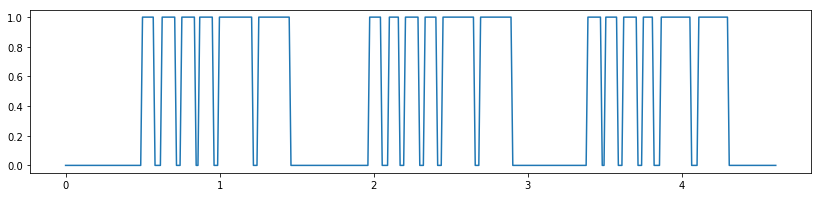

filename: Paraponiariko mou.mp3
mfcc shape (13, 19762)
number of chunks 411
file label size: 411
 


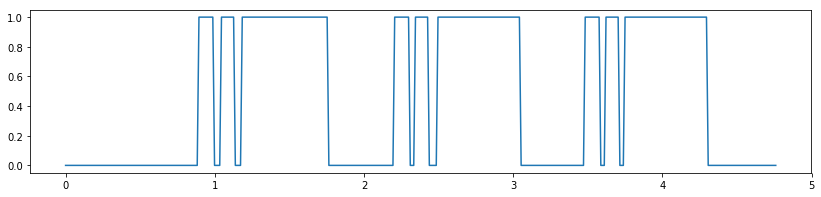

filename: 3an8eia smurniotopoula.mp3
mfcc shape (13, 20162)
number of chunks 420
file label size: 420
 


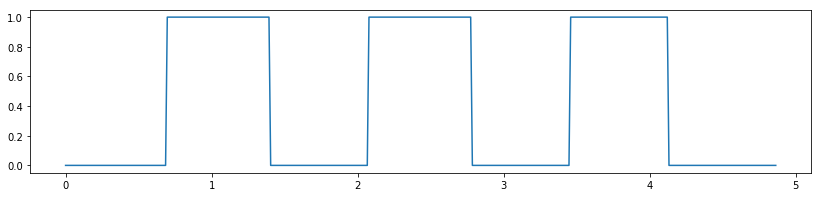

filename: 08 TA DAXTILIDIA.mp3
mfcc shape (13, 18561)
number of chunks 386
file label size: 386
 


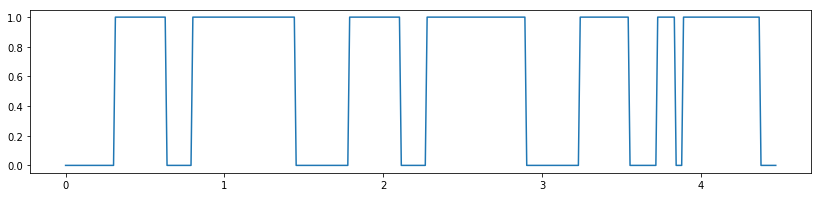

filename: 08 TO XARIKLAKI.mp3
mfcc shape (13, 19472)
number of chunks 405
file label size: 405
 


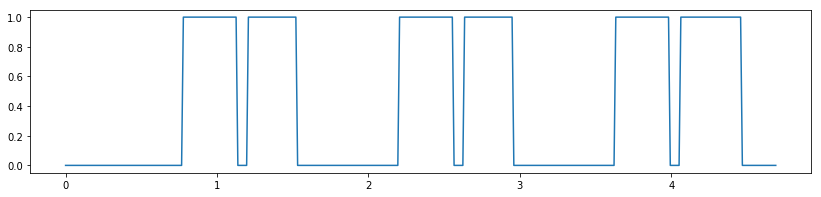

filename: 01 STI MAGEMENI ARAPIA.mp3
mfcc shape (13, 21643)
number of chunks 450
file label size: 450
 


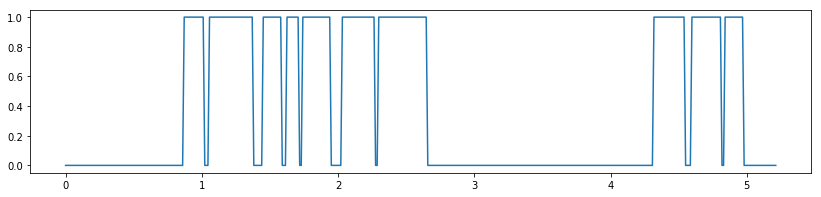

filename: 2-07 To Sakkaki.mp3
mfcc shape (13, 20130)
number of chunks 419
file label size: 419
 


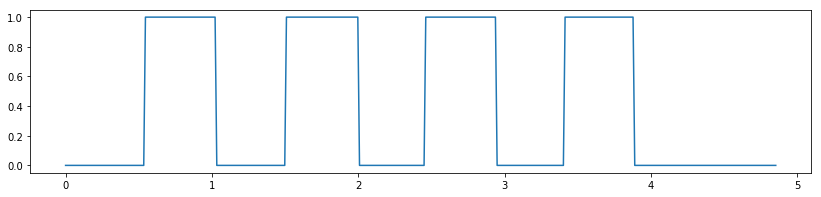

filename: 2-04 To Haremi Sto Hamam.mp3
mfcc shape (13, 19295)
number of chunks 401
file label size: 401
 


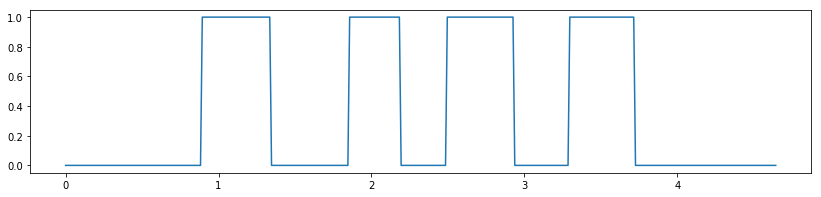

filename: 1-01 O Ponos Tu Prezakia.mp3
mfcc shape (13, 20371)
number of chunks 424
file label size: 424
 


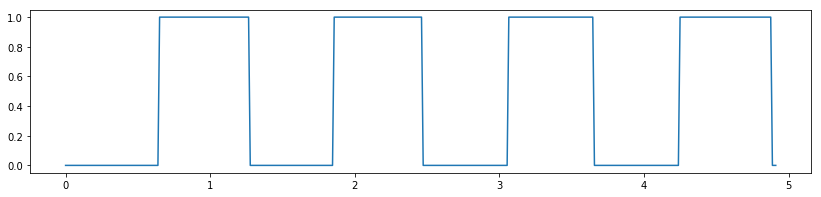

filename: 01 O katadikos.mp3
mfcc shape (13, 18383)
number of chunks 382
file label size: 382
 


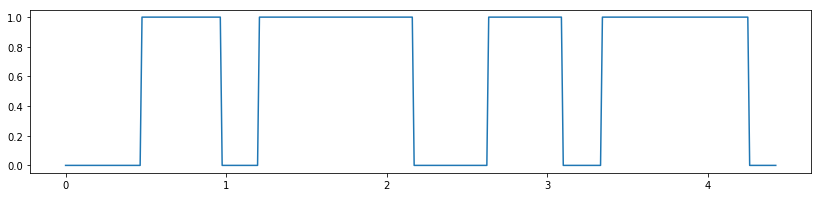

filename: 02 O glentzes.mp3
mfcc shape (13, 18135)
number of chunks 377
file label size: 377
 


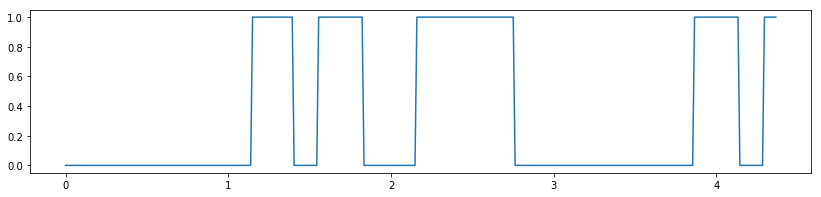

filename: 03 Geia sou lola meraklou.mp3
mfcc shape (13, 17442)
number of chunks 363
file label size: 363
 


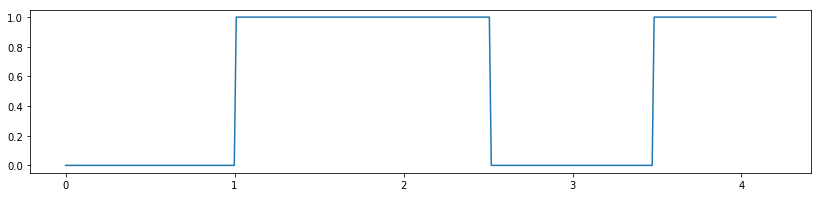

filename: 2-03 Oli I Rembetes Tu Dunia.mp3
mfcc shape (13, 19318)
number of chunks 402
file label size: 402
 


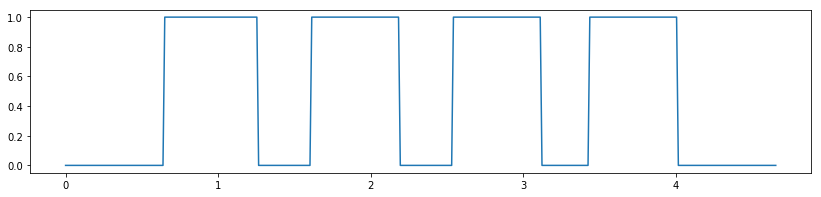

filename: 1-17 Kandone Stavro Kandone.mp3
mfcc shape (13, 19540)
number of chunks 407
file label size: 407
 


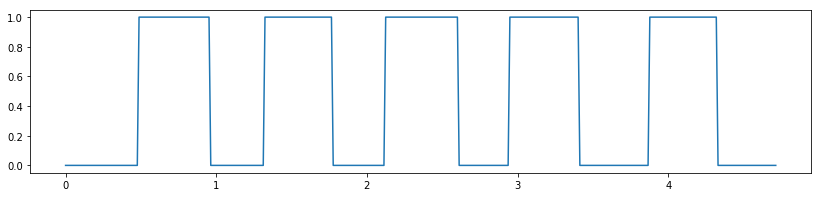

filename: 03 Rixe Tsiggana Ta Hartia.mp3
mfcc shape (13, 18480)
number of chunks 385
file label size: 385
 


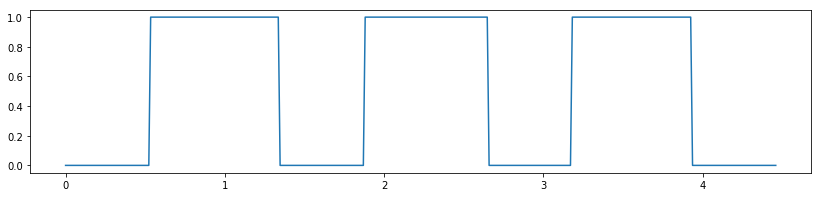

filename: 01 tou peiraia t alani.mp3
mfcc shape (13, 18903)
number of chunks 393
file label size: 393
 


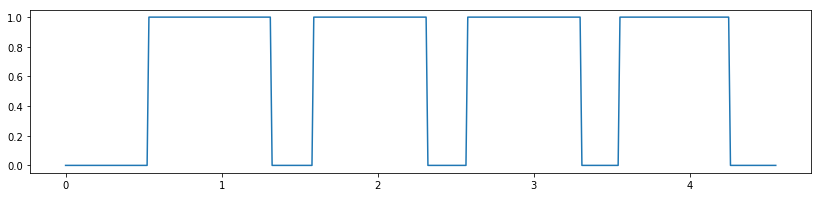

filename: 02 Eimai Prezakias.mp3
mfcc shape (13, 20154)
number of chunks 419
file label size: 419
 


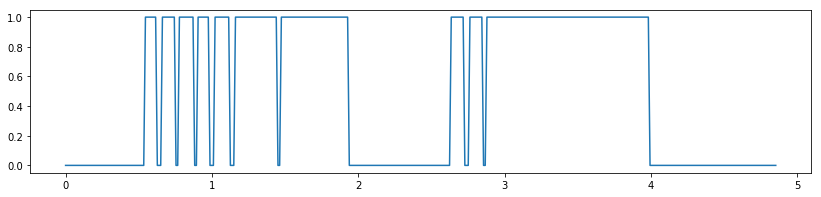

filename: 01 Stis Athinas tis Omorfies.mp3
mfcc shape (13, 19483)
number of chunks 405
file label size: 405
 


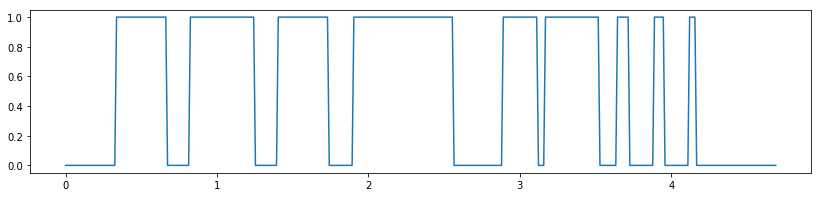

In [16]:
# Define lists to store the training features and corresponding training labels
train_features = []
train_labels = []

# For every audio file in the training set, load the file, compute MFCCs, summarize them over time
# using the mean and standard deviation (for each MFCC coefficient), and then save the features
# and corresponding label in the designated lists
for tf in train_files:
    
    print("filename: {:s}".format(os.path.basename(tf)))
    
    piece = tf

    audio, sr = librosa.load(piece, sr=None)

    # Load labels
    df = feather.read_dataframe(save_path + os.path.basename(piece.split('.')[0]) + '_lbl.feather')
    timestamps = np.arange(df['0'].shape[0])/(sr/512)
    
    # Load audio
    audio, sr = librosa.load(tf, sr=samplerate, mono=True)

    # Extract mfcc coefficients (remember we will discard the first one)
    # To see all the relevant kwarg arugments consult the documentation for
    # librosa.feature.mfcc, librosa.feature.melspectrogram and librosa.filters.mel
    mfcc = librosa.feature.mfcc(audio, sr=sr, n_fft=window_size, hop_length=hop_size,
                                fmax=samplerate/2, n_mels=n_bands, n_mfcc=(n_mfcc + 1))
          
    # Discard the first coefficient
    mfcc = mfcc[1:,:]
    
    print("mfcc shape", mfcc.shape)

    print("number of chunks", int(mfcc.shape[1]/half_sec))
    
    feature_vector = []
    tf_label = []
    
    # Delta features 
    mfcc_delta = librosa.feature.delta(mfcc)
    mfcc_delta2 = librosa.feature.delta(mfcc, order=2)
    
    tidx = 0
    # For half second
    for chunk in range(int(mfcc.shape[1]/half_sec)):
        start = chunk*half_sec
        mfcc_means = np.mean(mfcc[:,start:start+feature_length], 1)
        mfcc_stddevs = np.std(mfcc[:,start:start+feature_length], 1)
        mfcc_max = np.max(mfcc[:,start:start+feature_length], 1)
        mfcc_median = np.median(mfcc[:,start:start+feature_length], 1)
        mfcc_d1_means = np.mean(mfcc_delta[:,start:start+feature_length], 1)
        mfcc_d1_stddevs = np.std(mfcc_delta[:,start:start+feature_length], 1)
        mfcc_d2_means = np.mean(mfcc_delta2[:,start:start+feature_length], 1)
        mfcc_d2_stddevs = np.std(mfcc_delta2[:,start:start+feature_length], 1)
        
    
        # We could do the same for the delta features like this:
        # mfcc_d1_means = np.mean(np.diff(mfcc), 1)
        # mfcc_d1_stddevs = np.std(np.diff(mfcc), 1)
    
        # Concatenate means and std. dev's into a single feature vector
        feature_vector.append(np.concatenate((mfcc_means, mfcc_stddevs, mfcc_max, mfcc_median,\
                                              mfcc_d1_means, mfcc_d1_stddevs, mfcc_d2_means, mfcc_d2_stddevs\
                                             ), axis=0))
        #print("feature summary: {}".format(len(feature_vector)))
   
        # Adjust labels to our classes
        
        while tidx < len(timestamps)-1 and timestamps[tidx] < start*441/44100:
            tidx += 1
            
        if len([x for x in  df['0'][tidx:tidx+87] if x > 0]) >= 40: # 50%
            tf_label.append('present')
        else:
            tf_label.append('abscent')

    # Get labels index
    tf_label_ind = [labels.index(lbl) for lbl in tf_label]
    print("file label size: {:d}".format(len(tf_label_ind)))
    
    # Store the feature vector and corresponding label in integer format
    for idx in range(len(feature_vector)):
        train_features.append(feature_vector[idx])
        train_labels.append(tf_label_ind[idx]) 
    print(" ")
    
#     plt.figure(figsize=(14,3))
#     tt = np.arange(len(tf_label_ind))/(sr/512)
#     plt.plot(tt, tf_label_ind)
#     plt.show()
    

Next, do do the same for the test data (of course we must extact exactly the same features for the training and test sets):

In [17]:
# Define lists to store the training features and corresponding training labels
test_features = []
test_labels = []

# For every audio file in the training set, load the file, compute MFCCs, summarize them over time
# using the mean and standard deviation (for each MFCC coefficient), and then save the features
# and corresponding label in the designated lists
for tf in test_files:
    
    print("filename: {:s}".format(os.path.basename(tf)))
    
    piece = tf

    audio, sr = librosa.load(piece, sr=None)

    # Load labels
    df = feather.read_dataframe(save_path + os.path.basename(piece.split('.')[0]) + '_lbl.feather')
    timestamps = np.arange(df['0'].shape[0])/(sr/512)
    
    # Load audio
    audio, sr = librosa.load(tf, sr=samplerate, mono=True)

    # Extract mfcc coefficients (remember we will discard the first one)
    # To see all the relevant kwarg arugments consult the documentation for
    # librosa.feature.mfcc, librosa.feature.melspectrogram and librosa.filters.mel
    mfcc = librosa.feature.mfcc(audio, sr=sr, n_fft=window_size, hop_length=hop_size,
                                fmax=samplerate/2, n_mels=n_bands, n_mfcc=(n_mfcc + 1))
          
    # Discard the first coefficient
    mfcc = mfcc[1:,:]
    
    print("mfcc shape", mfcc.shape)

    print("number of chunks", int(mfcc.shape[1]/half_sec))
    
    feature_vector = []
    tf_label = []
    
    # Delta features 
    mfcc_delta = librosa.feature.delta(mfcc)
    mfcc_delta2 = librosa.feature.delta(mfcc, order=2)
    
    tidx = 0
    # For half second
    for chunk in range(int(mfcc.shape[1]/half_sec)):
        start = chunk*half_sec
        mfcc_means = np.mean(mfcc[:,start:start+feature_length], 1)
        mfcc_stddevs = np.std(mfcc[:,start:start+feature_length], 1)
        mfcc_max = np.max(mfcc[:,start:start+feature_length], 1)
        mfcc_median = np.median(mfcc[:,start:start+feature_length], 1)
        mfcc_d1_means = np.mean(mfcc_delta[:,start:start+feature_length], 1)
        mfcc_d1_stddevs = np.std(mfcc_delta[:,start:start+feature_length], 1)
        mfcc_d2_means = np.mean(mfcc_delta2[:,start:start+feature_length], 1)
        mfcc_d2_stddevs = np.std(mfcc_delta2[:,start:start+feature_length], 1)
        
    
        # We could do the same for the delta features like this:
        # mfcc_d1_means = np.mean(np.diff(mfcc), 1)
        # mfcc_d1_stddevs = np.std(np.diff(mfcc), 1)
    
        # Concatenate means and std. dev's into a single feature vector
        feature_vector.append(np.concatenate((mfcc_means, mfcc_stddevs, mfcc_max, mfcc_median,\
                                              mfcc_d1_means, mfcc_d1_stddevs, mfcc_d2_means, mfcc_d2_stddevs\
                                             ), axis=0))
        #print("feature summary: {}".format(len(feature_vector)))
   
        # Adjust labels to our classes
        
        while tidx < len(timestamps)-1 and timestamps[tidx] < start*441/44100:
            tidx += 1
            
        if len([x for x in  df['0'][tidx:tidx+87] if x > 0]) >= 40: # 50%
            tf_label.append('present')
        else:
            tf_label.append('abscent')

    # Get labels index
    tf_label_ind = [labels.index(lbl) for lbl in tf_label]
    print("file label size: {:d}".format(len(tf_label_ind)))
    
    # Store the feature vector and corresponding label in integer format
    for idx in range(len(feature_vector)):
        test_features.append(feature_vector[idx])
        test_labels.append(tf_label_ind[idx]) 
    print(" ")
    
#     plt.figure(figsize=(14,3))
#     tt = np.arange(len(tf_label_ind))/(sr/512)
#     plt.plot(tt, tf_label_ind)
#     plt.show()
    

filename: 07 nixtose xoris feggari.mp3
mfcc shape (13, 22562)
number of chunks 470
file label size: 470
 
filename: 02 aliti m eipes mia vradia.mp3
mfcc shape (13, 19434)
number of chunks 404
file label size: 404
 
filename: 01 karotseri trava.mp3
mfcc shape (13, 19485)
number of chunks 405
file label size: 405
 
filename: 01_Tsitsanhs_To_bapori_apo_thn_persi.mp3
mfcc shape (13, 18976)
number of chunks 395
file label size: 395
 
filename: 01 Sinnefiasmenh Kyriakh.mp3
mfcc shape (13, 20423)
number of chunks 425
file label size: 425
 
filename: 01 Apopse kaneis mpam.mp3
mfcc shape (13, 17058)
number of chunks 355
file label size: 355
 
filename: 01 Mpik' O Heimonas.mp3
mfcc shape (13, 20405)
number of chunks 425
file label size: 425
 
filename: 02 San Egyriza Apo Tin Pylo.mp3
mfcc shape (13, 20494)
number of chunks 426
file label size: 426
 
filename: 04 sampax amanes.mp3
mfcc shape (13, 21225)
number of chunks 442
file label size: 442
 
filename: 06 otan mpoukarw ston teke (streamlo.mp3

In [34]:
# Define lists to store the test features and corresponding test labels
test_features = []
test_labels = []

# For every audio file in the training set, load the file, compute MFCCs, summarize them over time
# using the mean and standard deviation (for each MFCC coefficient), and then save the features
# and corresponding label in the designated lists
for tf in test_files:
    
    print("filename: {:s}".format(os.path.basename(tf)))
    
    # Load audio
    audio, sr = librosa.load(tf, sr=samplerate, mono=True)

    # Extract mfcc coefficients (remember we will discard the first one)
    # To see all the relevant kwarg arugments consult the documentation for
    # librosa.feature.mfcc, librosa.feature.melspectrogram and librosa.filters.mel
    mfcc = librosa.feature.mfcc(audio, sr=sr, n_fft=window_size, hop_length=hop_size,
                                fmax=samplerate/2, n_mels=n_bands, n_mfcc=(n_mfcc + 1))
          
    # Discard the first coefficient
    mfcc = mfcc[1:,:]
    print("mfcc matrix shape: {}".format(mfcc.shape))
    
    # Read labels for each frame
    f0line = pd.read_csv(tf[:-7]+"vocal.csv",index_col=None, header=None)
    f0line = pd.DataFrame.as_matrix(f0line)
    f0line = f0line.T[0]
    
    #print (mfcc.shape)
    print("number of chunks", int(mfcc.shape[1]/half_sec))
    
    feature_vector = []
    tf_label = []
    
        # Delta features 
    mfcc_delta = librosa.feature.delta(mfcc)
    mfcc_delta2 = librosa.feature.delta(mfcc, order=2)
    
    # For half second
    for chunk in range(int(mfcc.shape[1]/half_sec)):
        start = chunk*half_sec
        mfcc_means = np.mean(mfcc[:,start:start+feature_length], 1)
        mfcc_stddevs = np.std(mfcc[:,start:start+feature_length], 1)
        mfcc_max = np.max(mfcc[:,start:start+feature_length], 1)
        mfcc_median = np.median(mfcc[:,start:start+feature_length], 1)
        mfcc_d1_means = np.mean(mfcc_delta[:,start:start+feature_length], 1)
        mfcc_d1_stddevs = np.std(mfcc_delta[:,start:start+feature_length], 1)
        mfcc_d2_means = np.mean(mfcc_delta2[:,start:start+feature_length], 1)
        mfcc_d2_stddevs = np.std(mfcc_delta2[:,start:start+feature_length], 1)
    
        # We could do the same for the delta features like this:
        # mfcc_d1_means = np.mean(np.diff(mfcc), 1)
        # mfcc_d1_stddevs = np.std(np.diff(mfcc), 1)
    
        # Concatenate means and std. dev's into a single feature vector
        feature_vector.append(np.concatenate((mfcc_means, mfcc_stddevs, mfcc_max, mfcc_median,\
                                              mfcc_d1_means, mfcc_d1_stddevs, mfcc_d2_means, mfcc_d2_stddevs\
                                             ), axis=0))
        #print("feature summary: {}".format(len(feature_vector)))
   
        # Adjust labels to our classes
        if len([x for x in f0line[start:start+feature_length] if x > 0]) >= 2*half_sec: # 100% of frames
            tf_label.append('present')
        else:
            tf_label.append('abscent')
    
    #Get labels index
    tf_label_ind = np.array([labels.index(lbl) for lbl in tf_label])
    print("file label size: {}".format(tf_label_ind.shape))
    
    
    # Store the feature vector and corresponding label in integer format
    for idx in range(len(feature_vector)):
        test_features.append(feature_vector[idx])
        test_labels.append(tf_label_ind[idx])
    print(" ")

filename: MusicDelta_Country2_MIX.wav
mfcc matrix shape: (13, 1746)
number of chunks 36
file label size: (36,)
 
filename: MusicDelta_Country1_MIX.wav
mfcc matrix shape: (13, 3475)
number of chunks 72
file label size: (72,)
 
filename: SweetLights_YouLetMeDown_MIX.wav
mfcc matrix shape: (13, 39199)
number of chunks 816
file label size: (816,)
 
filename: MusicDelta_Gospel_MIX.wav
mfcc matrix shape: (13, 7574)
number of chunks 157
file label size: (157,)
 
filename: PortStWillow_StayEven_MIX.wav
mfcc matrix shape: (13, 31702)
number of chunks 660
file label size: (660,)
 
filename: StrandOfOaks_Spacestation_MIX.wav
mfcc matrix shape: (13, 24387)
number of chunks 508
file label size: (508,)
 
filename: MusicDelta_Rock_MIX.wav
mfcc matrix shape: (13, 1310)
number of chunks 27
file label size: (27,)
 
filename: InvisibleFamiliars_DisturbingWildlife_MIX.wav
mfcc matrix shape: (13, 21870)
number of chunks 455
file label size: (455,)
 
filename: Snowmine_Curfews_MIX.wav
mfcc matrix shape: (13

Next we'll appply some post-processing in the form of feature standardization. In our case we're going to standardize across dimensions: this means we compare the feature vector of all files **in the training set** and for each dimension we subtract the mean and divide by the standard deviation across all feature vectors.

**Important**: it is incorrect to standardize the entire dataset (training and test) in one go, because that means we've "looked" at the test data. The correct way to perform standardization is to learn the parameters (mean/std. dev) from the training set only, and then apply exactly the same process to the test set (without examining the data). This can be accomplished easily using scikit-learn's StandardScaler:

In [18]:
# Create a scale object
scaler = sklearn.preprocessing.StandardScaler()

# Learn the parameters from the training data only
scaler.fit(train_features)

# Apply the learned parameters to the training and test sets:
train_features_scaled = scaler.transform(train_features)

In [19]:
test_features_scaled = scaler.transform(test_features)

# Note, the first 2 operations (learning the standardization parameters from the training data 
# and applying them to the the training data) can be performed in one line using:
# train_features_scaled = scaler.fit_transform(train_features)

In [20]:
# save the scaler to disk
filename = 'scaler.sav'
joblib.dump(scaler, filename)

['scaler.sav']

<h2> Step 3: model training</h2>

Now that all of our features are computed, we can train a clasification model! In this example we're going to use the following model: the support vector machine classifier. 

In [21]:
# Use scikit-learn to train a model with the training features we've extracted

# Lets use a SVC with folowing C parameters: 
params = [100, 10, 1, 0.1, 0.01, 0.001, 0.0001]

for c in params:
    clf = sklearn.svm.SVC(C=c)

    # Fit (=train) the model
    clf.fit(train_features_scaled, train_labels)
    
    # save the model to disk
    filename = 'finalized_model_SVM_'+str(c)+'.sav'
    print (filename)
    joblib.dump(clf, filename)
    
    # Now lets predict the labels of the test data!
    predictions = clf.predict(test_features_scaled)
    
    # We can use sklearn to compute the accuracy score
    accuracy = sklearn.metrics.accuracy_score(test_labels, predictions)
    print(accuracy)

finalized_model_SVM_100.sav
0.7885714285714286
finalized_model_SVM_10.sav
0.7979591836734694
finalized_model_SVM_1.sav
0.813469387755102
finalized_model_SVM_0.1.sav
0.8277551020408164
finalized_model_SVM_0.01.sav
0.8306122448979592
finalized_model_SVM_0.001.sav
0.59
finalized_model_SVM_0.0001.sav
0.59


In [36]:
# Use scikit-learn to train a model with the training features we've extracted

# Lets use a SVC with default parameters: kernel RBF 
clf = sklearn.svm.SVC(C=0.01)

# Fit (=train) the model
clf.fit(train_features_scaled, train_labels)

SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [37]:
# save the model to disk
filename = 'finalized_model.sav'
joblib.dump(clf, filename)

['finalized_model.sav']

<h2>Step 4: model evaluation (testing)</h2>

Now we're going to test the model by using it to predict the class labels of the test data!

In [38]:
# Now lets predict the labels of the test data!
predictions = clf.predict(test_features_scaled)

<h3>Model accuracy</h3>

How well did our model perform? The simplest statistic we can compute is the "classification accuracy": in the simplest case, this is the fraction of files in our test set that were classified correctly:

In [39]:
# We can use sklearn to compute the accuracy score
accuracy = sklearn.metrics.accuracy_score(test_labels, predictions)
print(accuracy)

0.8306122448979592


In [40]:
# The accuracy is also very easy to compute "manually"
my_accuracy = np.sum(predictions == np.asarray(test_labels)) / float(len(test_labels))
print(my_accuracy)

0.8306122448979592


<h3>Confusion matrix</h3>

But the accuracy is only the tip of the iceberg! The model also made some mistakes - what got confused with what? To answer this we can plot the **confusion matrix**: the rows of the matrix represent the true label, and the columns represent the label predicted by the model:

In [27]:
# lets compute the show the confusion matrix:
cm = sklearn.metrics.confusion_matrix(test_labels, predictions)
print(cm)

[[1567  442]
 [ 472 2419]]


The first row represents the classical class, the second row the rock class. The first column shows what the model predicted as classifical, and the second column what the model predicted as rock. This means the numbers along the diagonal of the matrix represent correct predictions. Here's what the matrix tells us:
 - top right: The model classified 9 classical files as classical (correct)
 - top left: The model classified 1 classical files as rock (mistakes)
 - bottom left: The model classified 0 rock files as classical (mistakes)
 - bottm right: The model classified 10 rock files as tock (correct)
 
We can also visualize the confusion matrix in a slightly more visually informative way:

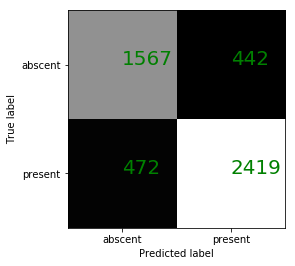

In [28]:
fig, ax = plt.subplots()
ax.imshow(cm, interpolation='nearest', cmap='gray')
for i, line in enumerate(cm):
    for j, l in enumerate(line):
        ax.text(j, i, l, size=20, color='green')
ax.set_xticks(range(len(cm)))
ax.set_xticklabels(labels)
ax.set_yticks(range(len(cm)))
ax.set_yticklabels(labels)
ax.set_ylabel('True label')
ax.set_xlabel('Predicted label')
plt.show()

Since in this example we have 2 classes (labels), the confusion matrix is 2x2. Furthermore, the confusions are fairly obvious, classical can only be confused with rock, and rock can only be confused with classical. However, when working on a multiclass problem (i.e. when there are more than 2 classes), the confusion matrix can be much more informative, as it tells us how much each class is confused with every other class. This can help us identify particularly problematic classes that are confused often, and help us figure out how to improve the model: are the classes well represented by the training data or do we need more data? Are the features that we're using sufficient for distinguishing between these classes, or do we need more/different features?

### Random Forest Classifier without scaler

In [30]:
from sklearn.ensemble import RandomForestClassifier
params = [10, 20, 50, 100, 120, 150]

for estimators in params:
    clf3 = RandomForestClassifier(n_estimators=estimators)

    # Fit (=train) the model
    clf3.fit(train_features, train_labels)
    
    # save the model to disk
    filename = 'finalized_model_RF_'+str(estimators)+'.sav'
    print (filename)
    joblib.dump(clf3, filename)
    
    # Now lets predict the labels of the test data!
    predictions = clf3.predict(test_features)
    # We can use sklearn to compute the accuracy score
    accuracy = sklearn.metrics.accuracy_score(test_labels, predictions)
    print(accuracy)

finalized_model_RF_10.sav
0.7606122448979592
finalized_model_RF_20.sav
0.7930612244897959
finalized_model_RF_50.sav
0.8053061224489796
finalized_model_RF_100.sav
0.833265306122449
finalized_model_RF_120.sav
0.8175510204081633
finalized_model_RF_150.sav
0.8222448979591837


In [31]:
from sklearn.ensemble import RandomForestClassifier
clf3 = RandomForestClassifier(n_estimators=100)

# Fit (=train) the model
clf3.fit(train_features, train_labels)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

<h2>Step 4: model evaluation Random Forest Classifier (testing)</h2>

Now we're going to test the model by using it to predict the class labels of the test data!

In [32]:
# Now lets predict the labels of the test data!
predictions = clf3.predict(test_features)

<h3>Model accuracy</h3>

How well did our model perform? The simplest statistic we can compute is the "classification accuracy": in the simplest case, this is the fraction of files in our test set that were classified correctly:

In [33]:
# We can use sklearn to compute the accuracy score
accuracy = sklearn.metrics.accuracy_score(test_labels, predictions)
print(accuracy)

0.8330612244897959


<h3>Confusion matrix</h3>

But the accuracy is only the tip of the iceberg! The model also made some mistakes - what got confused with what? To answer this we can plot the **confusion matrix**: the rows of the matrix represent the true label, and the columns represent the label predicted by the model:

In [34]:
# lets compute the show the confusion matrix:
cm = sklearn.metrics.confusion_matrix(test_labels, predictions)
print(cm)

[[1623  386]
 [ 432 2459]]


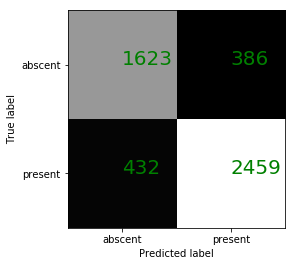

In [35]:
fig, ax = plt.subplots()
ax.imshow(cm, interpolation='nearest', cmap='gray')
for i, line in enumerate(cm):
    for j, l in enumerate(line):
        ax.text(j, i, l, size=20, color='green')
ax.set_xticks(range(len(cm)))
ax.set_xticklabels(labels)
ax.set_yticks(range(len(cm)))
ax.set_yticklabels(labels)
ax.set_ylabel('True label')
ax.set_xlabel('Predicted label')
plt.show()

### Testing with test set


In [25]:
# Load trained model (SVM)
filename = 'finalized_model_SVM_0.1.sav' 
# load the model from disk
clf = joblib.load(filename)

# Now lets predict the labels of the test data!
predictions = clf.predict(test_features_scaled)

# We can use sklearn to compute the accuracy score
accuracy = sklearn.metrics.accuracy_score(test_labels, predictions)
print(accuracy)

0.846128875183


In [36]:
# Load trained model (RF)
filename = 'finalized_model_RF_500.sav' 
# load the model from disk
clf3 = joblib.load(filename)

# Now lets predict the labels of the test data!
predictions = clf3.predict(test_features)
# We can use sklearn to compute the accuracy score
accuracy = sklearn.metrics.accuracy_score(test_labels, predictions)
print(accuracy)

0.751287332647
